## Imports

In [1]:
print('')

In [2]:
import os
import math
import obspy
import pickle
import datetime
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
from scipy.optimize import curve_fit
from datetime import timedelta
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

from earthquake import Earthquake
import util
import pandas as pd

## Get set up
Set path to data, and read eq_list (all folders in root folder)

In [3]:
root = '/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/'

eq_list = os.listdir(root)

Open catalog of events

In [4]:
client = Client("IRIS")
# cat = client.get_events(starttime=UTCDateTime("2019-01-01"), endtime=UTCDateTime("2020-01-01"), minmagnitude=5, includearrivals=True)
cat = obspy.read_events('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3_catalog.xml')

do_ypcall: clnt_call: RPC: Timed out
do_ypcall: clnt_call: RPC: Timed out
do_ypcall: clnt_call: RPC: Timed out


Not all events had suitable data, look through all events and make a list of ones which have data (eq_with_data) and were successfully picked

In [5]:
eq_with_data = []
cat_with_data = cat.copy()
cat_with_data.clear()
for event in cat:
    eq_name = util.catEventToFileName(event)
    if os.path.isdir(root+eq_name) and os.path.isdir(root+eq_name+'/station_xml_files') and os.path.exists(root+eq_name+'/picks.pkl'):
        eq_with_data.append(eq_name)
        cat_with_data.extend([event])

## the action!!
For all events with data, load their object . add tp_max and tc  to lists (for plotting)

In [95]:
list_tpmax = []
list_mags = []
list_mag_types = []
list_eq = []
eqs = {}
count = 0

In [96]:
WINDOW_LENGTH = 4
for eq_no in range(0, len(eq_with_data)):
    #print(eq_no)
    try:
        with open('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/'+eq_with_data[eq_no]+'/eq_object.pkl', 'rb') as picklefile:
            eq = pickle.load(picklefile)
        #for num_station in range(0, len(eq.calculated_params['tau_p_max'])):
            #distance = eq.calculated_params['iv2'][num_station][1]
        list_tpmax.append(eq.calculated_params['tau_p_max'])
        list_mags.append(eq.event_stats['eq_mag'])
            #list_dist.append(distance)
        list_mag_types.append(eq.event_stats['eq_mag_type'])
    except Exception:
        print('in except')
        continue

in except


In [97]:
def model_function(x_data, a, b):
    return 10**(a*x_data + b)

In [98]:
def model_function_2(x_data, a, b):
    return a*x_data + b

In [183]:
len(np.arange(3, 6.5, 0.1))

35

In [182]:
np.linspace(0.2,1,45)

array([ 0.2       ,  0.21818182,  0.23636364,  0.25454545,  0.27272727,
        0.29090909,  0.30909091,  0.32727273,  0.34545455,  0.36363636,
        0.38181818,  0.4       ,  0.41818182,  0.43636364,  0.45454545,
        0.47272727,  0.49090909,  0.50909091,  0.52727273,  0.54545455,
        0.56363636,  0.58181818,  0.6       ,  0.61818182,  0.63636364,
        0.65454545,  0.67272727,  0.69090909,  0.70909091,  0.72727273,
        0.74545455,  0.76363636,  0.78181818,  0.8       ,  0.81818182,
        0.83636364,  0.85454545,  0.87272727,  0.89090909,  0.90909091,
        0.92727273,  0.94545455,  0.96363636,  0.98181818,  1.        ])

In [189]:
params = []
opacities = np.linspace(0.2,1,45)
import matplotlib.pyplot as plt
cs = ['#00a1c1']
fig, axs = plt.subplots(1,1, figsize=(12.8,9.6))
y_aves_tp = []
x_aves_tp = []
count = 1
eq_count = 0
for mag_lim in np.arange(3, 6.5, 0.1):
    #print(mag_lim)
    y_aves_tp = []
    x_aves_tp = []
    for i  in range(0, len(list_mags)):
        #print(i)
        #mag_lim = 3
        #print(list_mags[i])
        #print(list_tpmax[i])
        if list_mags[i] > mag_lim and list_mags[i]<=max(list_mags):
            #print('in if')
            mean_tp = np.mean(list_tpmax[i]) 
            std_tp = np.std(list_tpmax[i]) 
            y_tp = [] 
            for j in list_tpmax[i]: 
                if j > mean_tp-2*std_tp and j < mean_tp + 2*std_tp:# and j < 100: 
                    y_tp.append(math.log(j, 10))
            #print(y_tp)
            x_tp = np.zeros(len(y_tp))  
            x_tp = x_tp + list_mags[i]  
            #print(x_tp)
            c = 0
            #if str(mag_lim) == str(3):# or mag_lim == 3: or 4.4?
                #print('in if')
            if len(x_tp)>0: # or len(x_tc)>0:
                if math.isnan(np.median(y_tp))==False:
                    axs.scatter(x_tp, y_tp, s = 15, alpha = 0.2, c = cs[c], marker = 'o', zorder =3) 
                #axs[0].scatter(list_mags[i], np.mean(y_tp), s = 50, c = cs[c], marker = 'o')
                    axs.scatter(list_mags[i], np.median(y_tp), s = 50, c = cs[c], marker = '^', zorder =4, alpha = 0.7)
                #axs[1].scatter(x_tc, y_tc, s = 15, alpha = 0.3, c = cs[c], marker = '^', zorder =3) 
                #axs[1].scatter(list_mags[i], np.median(y_tc), s = 50, c = cs[c], marker = '^', zorder =4)
                #axs[1].scatter(list_mags[i], np.mean(y_tc), s = 50, c = cs[c], marker = 'o')
                #FOR CURVE FITTING
            if math.isnan(np.median(y_tp))==False:  
                #if np.median(y_tp):
                y_aves_tp.append(np.median(y_tp))
                x_aves_tp.append(list_mags[i])
            #if math.isnan(np.median(y_tc))==False:
                #y_aves_tc.append(np.median(y_tc))
                #x_aves_tc.append(list_mags[i])
    popt, pcov = curve_fit(model_function_2, x_aves_tp, y_aves_tp)
    params.append([popt, len(x_aves_tp)])
    print(mag_lim, popt)
    axs.plot(np.array(x_aves_tp), model_function_2(np.array(x_aves_tp), *popt), color = '#003f5c', alpha = opacities[count], zorder =10)
    if str(mag_lim) == str(3.4):
        popt, pcov = curve_fit(model_function_2, x_aves_tp, y_aves_tp, absolute_sigma = True)
        axs.plot(np.array(x_aves_tp), model_function_2(np.array(x_aves_tp), *popt), color='lime', zorder =100)
        popt_final, pcov_final = popt, pcov
    #print(x_aves_tp)
    #print(y_aves_tp)
    print(len(x_aves_tp), len(y_aves_tp))
    # add 2 * std banding
    count += 1
popt, pcov = popt_final, pcov_final
perr = np.sqrt(np.diag(pcov))
print(popt, perr)
x_me = np.arange(3, 7.2, 0.1)
x_lower_me = x_me - perr[1]*2
x_upper_me =  x_me + perr[1]*2
y_me = popt[0]*x_me+popt[1]
y_lower_me = popt[0]*x_lower_me-popt[1]
y_upper_me = popt[0]*x_upper_me-popt[1]
#axs[0].plot(x, y_me, color = '')
axs.fill_between(x_me, model_function_2(np.array(x_lower_me), *popt), model_function_2(np.array(x_upper_me), *popt), color = '#8adfff', alpha = 0.52, zorder =1)
axs.plot(x_me, model_function_2(np.array(x_lower_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
axs.plot(x_me, model_function_2(np.array(x_upper_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
    # add 2 * std banding
#axs[0].set_ylim([0.2,2])
#axs[0].set_yscale('log')
#axs[1].set_yscale('log')
#count += 1
#x = np.arange(3, 7.2, 0.1)
#y = 0.14*x-0.83
#axs.plot(x, y, color = '#2a83ab', zorder =12)
axs.set_xlabel("magnitude", fontsize = 14) 
#axs[1].set_xlabel("magnitude") 
axs.set_ylabel("log(tp_max)", fontsize = 14) 
axs.tick_params(axis='both', which='major', labelsize=14)
axs.tick_params(axis='both', which='minor', labelsize=14)
#axs[1].set_ylabel("tc")
#axs.set_title("tp_max") 
#axs[1].set_title("tc") 
#fig.suptitle("median = triangle")
#axs.set_ylim(-1, 1)

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  

3.0 [-0.02286376  0.09708441]
1981 1981


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  

3.1 [ 0.01585765 -0.07059076]
1710 1710


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  

3.2 [ 0.03766064 -0.16623731]
1496 1496


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  

3.3 [ 0.05718895 -0.25304627]
1320 1320


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  

3.4 [ 0.10450511 -0.46542928]
1168 1168


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  

3.5 [ 0.12553321 -0.5609892 ]
1049 1049


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  

3.6 [ 0.15675475 -0.70423474]
953 953


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  

3.7 [ 0.17381229 -0.78317651]
876 876


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  

3.8 [ 0.21103852 -0.95689598]
816 816


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  

3.9 [ 0.23259991 -1.05847247]
767 767


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  

4.0 [ 0.24316564 -1.10883566]
715 715


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  

4.1 [ 0.25632601 -1.17235407]
623 623


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  

4.2 [ 0.27218552 -1.25024659]
550 550


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  

4.3 [ 0.30458748 -1.41266309]
441 441


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  

4.4 [ 0.34918479 -1.64117348]
316 316


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  

4.5 [ 0.43217831 -2.07676805]
214 214


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  

4.6 [ 0.48349032 -2.35107894]
162 162


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  

4.7 [ 0.5262316 -2.5834587]
132 132


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  

4.8 [ 0.54831372 -2.70575249]
96 96


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  

4.9 [ 0.55200091 -2.72632406]
71 71


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  

5.0 [ 0.5347418  -2.62755532]
58 58


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  

5.1 [ 0.58345348 -2.91096661]
48 48


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  

5.2 [ 0.51678166 -2.51526743]
36 36


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  

5.3 [ 0.75481324 -3.95817332]
24 24


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  

5.4 [ 0.81713706 -4.34074962]
17 17


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  

5.5 [ 0.80378485 -4.25731686]
15 15


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  

5.6 [ 0.60721828 -3.01038766]
9 9


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  

5.7 [ 0.47295667 -2.14966189]
7 7


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  

5.8 [ 0.47295667 -2.14966189]
7 7


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  

5.9 [ 1.0489387  -5.90606643]
5 5


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  

6.0 [ 1.59379455 -9.48395318]
4 4


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  

6.1 [  2.71111116 -16.85824276]
3 3


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  

6.2 [  2.71111116 -16.85824276]
3 3


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  

6.3 [  2.71111116 -16.85824276]
3 3
6.4 [-0.2303968  2.7322002]
2 2
[ 0.10450511 -0.46542928] [ 0.05834086  0.24566847]


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  

In [111]:
list_mag

NameError: name 'list_mag' is not defined

In [101]:
popt

array([-0.0446477 ,  0.19014529])

In [102]:
pcov

array([[ 0.00112953, -0.00417911],
       [-0.00417911,  0.01591436]])

In [119]:
gradt = []
intercept = []
for i in params:
    gradt.append(i[0])
    intercept.append(i[1])

In [124]:
bins

array([ 3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,
        4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,
        5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,
        6.3,  6.4,  6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,
        7.4])

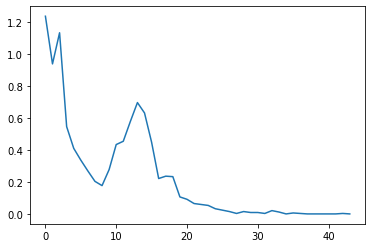

In [142]:
plt.plot(n)

In [178]:
%matplotlib qt
# create figure and axis objects with subplots()
fig,axs = plt.subplots(4,1, figsize = (15,9), sharex = True)
ax = axs[0]
ax4 = axs[1]
ax2 = axs[2]
ax3 = axs[3]
# make a plot
n, bins = np.histogram(list_mags, bins=np.arange(3,7.5,0.1))
ax.plot(bins[:-1]+0.05, n, color="red", marker="o")
n, bins = np.histogram(list_mags, bins=np.arange(3,7.5,0.1))
for i in range(1, len(n)):
    n[i] = n[i]+n[i-1]
#ax4 = ax.twinx()
ax4.plot(bins[:-1]+0.05, n, color="red", marker="o")
# set x-axis label
#ax.set_xlabel("year",fontsize=14)
# set y-axis label
#ax.set_ylabel("lifeExp",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
#ax2=ax.twinx()
#ax3=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(np.arange(3,6.6,0.1),intercept, color="blue",marker="o")
ax2.hlines(-0.83, 3, 7.5, color='blue')
ax3.plot(np.arange(3,6.6,0.1),gradt, color="green",marker="o")
ax2.set_ylabel("gdpPercap",color="blue",fontsize=14)
ax3.hlines(0.14, 3, 7.5, color='green')

ax.set_yscale('log')
ax4.set_yscale('log')
axs[0].grid(axis = 'both', which='major', linestyle='-', color='darkgrey')
axs[0].grid(axis = 'x', which='minor', linestyle=':')
axs[1].grid(axis = 'both', which='major', linestyle='-', color='darkgrey')
axs[1].grid(axis = 'x', which='minor', linestyle=':')
axs[2].grid(axis = 'both', which='major', linestyle='-', color='darkgrey')
axs[2].grid(axis = 'x',which='minor', linestyle=':')
axs[3].grid(axis = 'both', which='major', linestyle='-', color='darkgrey')
axs[3].grid(axis = 'x', which='minor', linestyle=':')
ax.minorticks_on()
ax2.minorticks_on()
ax3.minorticks_on()
ax4.minorticks_on()

ax.set_ylabel("log(N)",color="red",fontsize=14)
ax4.set_ylabel("log(cumulative N)",color="red",fontsize=14)
ax2.set_ylabel("intercept",color="blue",fontsize=14)
ax3.set_ylabel("gradient",color="green",fontsize=14)
ax3.set_xlabel('magnitude')
#ax3.set_xlim([3,5])
plt.show()

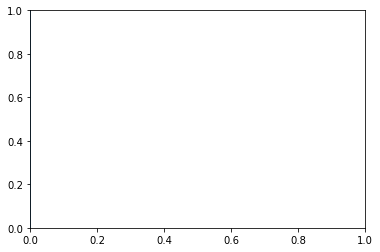

In [133]:
plt.axvline()

In [179]:
plt.hist(list_mags, bins = np.arange(3,7.5,0.1))
plt.yscale('log')
plt.ylabel('log(N)')
plt.xlabel('magnitude')

Text(0.5, 0, 'magnitude')